# Movie dataset analysis

The production of a new movie with a budget of £1,500,000 has been proposed by the movie production company, however the last movie produced lost money. Therefore, analysing historical data of movies could help to highlight areas which need focusing on during the production.

An exploratory data analysis (EDA) was carried out on the movies_metadata file provided. a range of variables were investigated, to see if relationships could be detected between variables.

Hypothesis testing was also undertaken to formally investigate assumptions on the dataset.

## Exploratory Data Analysis

In [1]:
myfile='movie_metadata.csv'
#standard imports for when working with pandas
import numpy as np
#matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd

myfile = 'movie_metadata.csv'

#read the movie metadata file into a dataframe in pandas.
df = pd.read_csv(myfile,index_col=None)
#print(df.head())
#print(df.info())
#print(df["gross"][1:200])

C:\Users\Toshiba\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


### Content rating
Relationships between the content rating of movies and the gross income were investigated and boxplots created. Movie budgets over £1,500,000 were excluded. The remaining data was split with half used for the EDA and the other half used for hypothesis testing. This was done to avoid p-hacking. Movies with unknown budget data were excluded.


In [2]:
import random

random.seed(10)
#drop nan values from gross
df = df.dropna(subset = ["gross"])
#print(df.info())
#split dataset into 2 equal sizes
from sklearn.model_selection import train_test_split
df_EDA, df_TEST = train_test_split(df, test_size=0.5, random_state = 0)
#print(df_EDA.info())
#drop nan from budget
df_EDA = df_EDA.dropna(subset = ["budget"])
df_EDA = df_EDA[df_EDA["budget"]<1500000]
#print(df_EDA.info())
#print(df_EDA["gross"].describe())
#find mean for each year
df_EDA.groupby("title_year")["gross"].mean()
#print(df_EDA["title_year"])
# box plot

import seaborn as sns
sns.set()


R            74
PG           12
Not Rated     9
PG-13         9
Unrated       5
Approved      3
NC-17         2
G             1
Passed        1
Name: content_rating, dtype: int64
mean value for content rating PG: 27001132.5
mean value for content rating R: 9100531.891891891


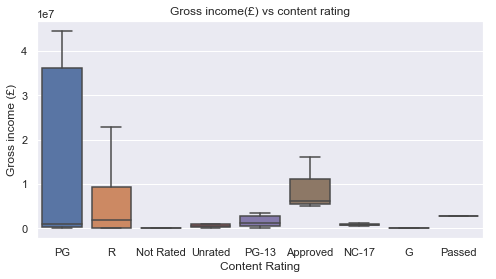

In [3]:
#show most frequently used rating
rating_counts = df_EDA["content_rating"].value_counts()
print(rating_counts)
#create boxplot for gross income by each rating
sns.set(rc={"figure.figsize":(8, 4)})
sns.boxplot(x='content_rating', y='gross', data=df_EDA, showfliers = False)
plt.title('Gross income(£) vs content rating')
plt.xlabel('Content Rating')
plt.ylabel('Gross income (£)')
#show movies made under "approved" rating
df_EDA[df_EDA["content_rating"] == "Approved"]
#calculate means for most popular ratings
print("mean value for content rating PG:" ,df_EDA[df_EDA["content_rating"] == "PG"]["gross"].mean())
print("mean value for content rating R:",df_EDA[df_EDA["content_rating"] == "R"]["gross"].mean())


From the most frequently used rating, the data was positively skewed, with the mean gross income greater than the median gross income. The range of results was greatest for the PG rating. R rated movies have a higher median gross income than PG rated movies, however a smaller range. Approved rated movies had the highest median value, however this rating only existed before 1970. Only 4 of the content ratings (PG, R, PG-13 and "Not rated") had more than 8 movies in the dataset.

the PG rating had a greater mean value than R rating.

### Year of release
Another variable that may have influenced the gross income was  the year released, hence boxplots were created for mean gross income for each year. Only movies in the 21st century were investigated.

Text(0, 0.5, 'Gross income (£)')

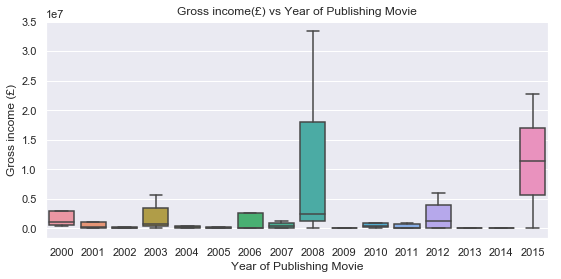

In [4]:
#boxplot for gross mean by year of release
sns.set(rc={"figure.figsize":(9, 4)})
df_EDA["title_year"] = df_EDA["title_year"].astype(int)
sns.boxplot(x='title_year', y='gross', data=df_EDA[df_EDA["title_year"]>1999], showfliers = False)
plt.title('Gross income(£) vs Year of Publishing Movie')
plt.xlabel('Year of Publishing Movie')
plt.ylabel('Gross income (£)')

Generally, the data was negatively skewed, except for 2015. 2008 and 2015 had a wide range of gross incomes from the produced movies.

In [5]:
#investigate exceptional years
df_EDA[df_EDA["title_year"] == 2008] 

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
4684,Color,Oliver Blackburn,114.0,99.0,4.0,201.0,Nichola Burley,1000.0,18378.0,Crime|Drama|Horror|Thriller,...,74.0,English,UK,R,900000.0,2008,233.0,5.2,1.85,0
4561,Color,Courtney Hunt,181.0,97.0,33.0,229.0,Michael O'Keefe,496.0,2508841.0,Crime|Drama,...,93.0,English,USA,R,1000000.0,2008,238.0,7.2,1.85,0
4723,Color,Alex Kendrick,50.0,122.0,589.0,150.0,Ken Bevel,848.0,33451479.0,Drama|Romance,...,215.0,English,USA,PG,500000.0,2008,153.0,6.5,1.85,0


In [6]:
#investigate exceptional years
df_EDA[df_EDA["title_year"] == 2015] 

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
4815,Color,Mor Loushy,23.0,84.0,0.0,NaN,NaN,3.0,34151.0,Documentary|History,...,3.0,Hebrew,Israel,NaN,450000.0,2015,NaN,7.2,1.78,111
4956,Color,Travis Cluff,159.0,81.0,3.0,7.0,Cassidy Gifford,220.0,22757819.0,Horror|Thriller,...,150.0,English,USA,R,100000.0,2015,40.0,4.2,1.85,0


A few specific movies (row 4723 and 4956) had exceptional gross incomes in 2008 and 2015, heavily influencing these years mean gross income.

### Year of release - correlation plots
scatter plots were created to observe the mean income per year.

Text(0, 0.5, 'Gross mean income (£)')

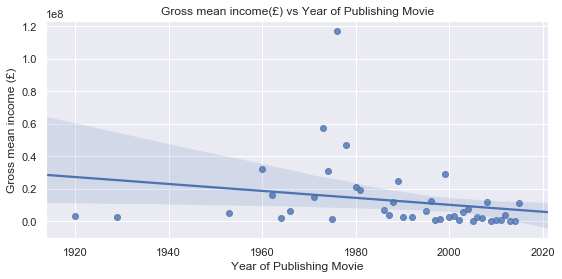

In [7]:
#scatter plot of mean gorss income per year for whole data set
data_mean_year = pd.DataFrame(df_EDA.groupby("title_year")["gross"].mean().reset_index(name='gross_mean')).astype(int)

sns.regplot(x='title_year', y='gross_mean', data=data_mean_year)
plt.title('Gross mean income(£) vs Year of Publishing Movie')
plt.xlabel('Year of Publishing Movie')
plt.ylabel('Gross mean income (£)')

Text(0, 0.5, 'Gross mean income (£)')

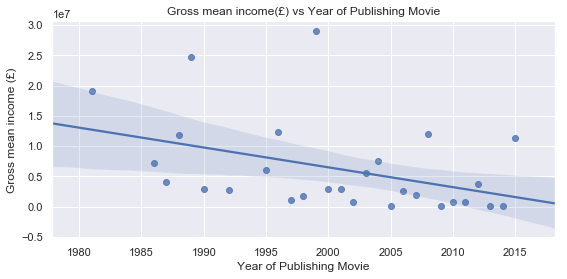

In [8]:
#scatter plot of mean gorss income per year for years after 1980
sns.regplot(x='title_year', y='gross_mean', data=data_mean_year[data_mean_year["title_year"]>1980])
plt.title('Gross mean income(£) vs Year of Publishing Movie')
plt.xlabel('Year of Publishing Movie')
plt.ylabel('Gross mean income (£)')

pearson coefficent is: 0.02852263761765886
spearman coefficent is: -0.25 hence the function is not monotonic


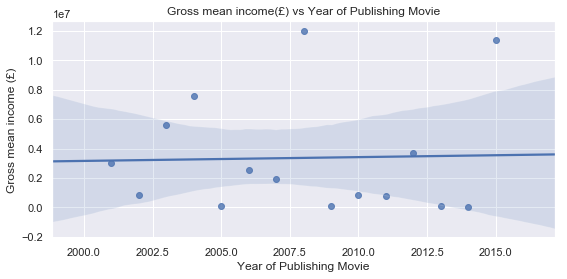

In [9]:
#scatter plot of mean gorss income per years after 2000
data_mean_year = data_mean_year[data_mean_year["title_year"]>2000]
sns.regplot(x='title_year', y='gross_mean', data=data_mean_year[data_mean_year["title_year"]>2000])
plt.title('Gross mean income(£) vs Year of Publishing Movie')
plt.xlabel('Year of Publishing Movie')
plt.ylabel('Gross mean income (£)')
# calculate spearman and pearson to see if any trends exist
pearson = data_mean_year.title_year.corr(data_mean_year.gross_mean, method="pearson")
spearman = data_mean_year.title_year.corr(data_mean_year.gross_mean, method="spearman")
print("pearson coefficent is:",pearson)
print("spearman coefficent is:",spearman, "hence the function is not monotonic")

Over the past 20 years, there is no obvious trend in gross income. Occasionally, there's an exceptionally high mean gross income, though this is rare.

### Movie rating and income
Movies were split into different score ratings(very low, low, high, very high) to investiage if a good movie score effected the mean gross income. A boxplot of scores was created to visualise the skew.

  imdb_stats   gross_score
0       high  5.733334e+06
1        low  6.999498e+06
2  very high  1.359329e+07
3   very low  4.210787e+06


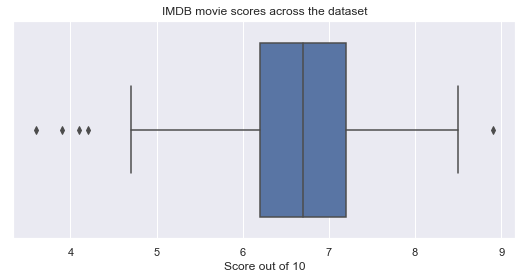

In [10]:
#do facebook likes influnce movie rating?
#boxplot for score ratings in the data set
sns.boxplot(x='imdb_score', data=df_EDA)
plt.title('IMDB movie scores across the dataset')
plt.xlabel('Score out of 10')
#less than 6.2 very low
#less than 6.7 low
#less than 7.2 high
#lgreater than 7.2 very high

#function splits a numerical list in to specific catergorys
def imdb_stats(value):
    if value < 6.2:
        return "very low"
    if 6.2 <= value < 6.7:
        return "low"
    elif 6.7 <= value < 7.2:
        return "high"
    elif value >= 7.2:
        return "very high"
df_EDA['imdb_stats'] = df_EDA['imdb_score'].map(imdb_stats)
data_mean_score = pd.DataFrame(df_EDA.groupby("imdb_stats")["gross"].mean().reset_index(name='gross_score'))
#show mean income for each category created
print(data_mean_score)

The boxplot shows nearly symmetrical skew, half the scores lie between 6.2/10 and 7.2/10. The gross income was higher for movies with a very high score, and movies with a very low score made the least income. This suggest movies which score in the top 25th percentile, above a rating of 7.2 will be most likely to make good returns.

### Movie Facebook likes and score group
From the movie ratings, we can find the mean number of total Facebook likes, for each rating group.

Text(0, 0.5, 'number of facebook likes')

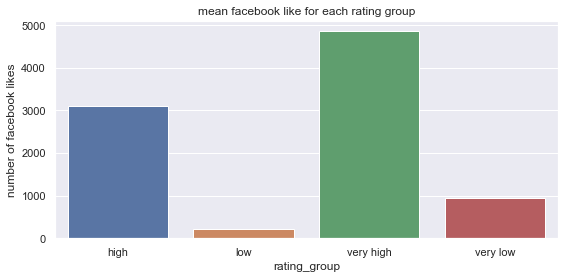

In [11]:
#calulate facebook mean likes for each category
data_likes_rating = df_EDA.groupby("imdb_stats")["movie_facebook_likes"].mean().reset_index(name='gross_rating')
#bar plot for each category
sns.barplot(x='imdb_stats', y='gross_rating', data=data_likes_rating)
plt.title('mean facebook like for each rating group')
plt.xlabel('rating_group')
plt.ylabel('number of facebook likes')

We can see that, the better the rating, the higher the mean total Facebook likes, especially looking at the differences between the high and very high category with an average of 2000 more Facebook likes for the very high category.

## Hypothesis testing:
The mean value of the gross income for movies rated PG and R from the EDA was tested to see if the testing data agreed with the EDA. a null and alternative hypothesis was set and a test statistic calculated, by taking away the mean and dividing by the standard error, the test statistic was converted to a p value using the stats package (cumulative normal distribution), to verify if the test statistic fell in the critical region.
    

In [12]:
from scipy import stats
from statistics import variance
#select values under 1,500,000 as before
df_TEST = df_TEST[df_TEST["budget"]<1500000]
#print(df_TEST)
#drop nan values
df_TEST = df_TEST.dropna(subset = ["gross"])
mean_value = df_EDA[df_EDA["content_rating"] == "PG"]["gross"].mean()
print("mean value for content rating PG:",mean_value)
#the mean gross from a film rated PG was 27 million
#h0 mean= 27 million
#h1 mean != 27 million
#calculate summary statistics to calculate standard error
content_rating_means=df_TEST.groupby('content_rating')['gross'].mean()
content_rating_std=df_TEST.groupby('content_rating')['gross'].std()
content_rating_count=df_TEST.groupby('content_rating')['gross'].count()
a = (content_rating_means['PG']-mean_value)
b = (content_rating_std['PG']/np.sqrt(content_rating_count['PG']))
print('value of test statistic for PG rated movies: ',a/b)
p_value_from_normal = (1-stats.t.cdf(a/b,content_rating_count['PG']))
print("P value:",p_value_from_normal)
#the mean gross from a film rated R was 9.1 million
#h0 mean= 9.1 million
#h1 mean != 9.1 million

mean_value = df_EDA[df_EDA["content_rating"] == "R"]["gross"].mean()
print("mean value for content rating R:",mean_value)
a = (content_rating_means['R']-mean_value)
b = (content_rating_std['R']/np.sqrt(content_rating_count['R']))
print('value of test statistic for R rated movies: ',a/b)
p_value_from_normal = (1-stats.t.cdf(a/b,content_rating_count['R']))
print("P value:",p_value_from_normal)


mean value for content rating PG: 27001132.5
value of test statistic for PG rated movies:  -11.483316764345249
P value: 0.9999994403963499
mean value for content rating R: 9100531.891891891
value of test statistic for R rated movies:  -1.2947842700197458
P value: 0.9001130400080176


The p-value for the PG rated test was p=0.99 (Z = -11.5), this value is in the critical region for the two-sided test and hence we can reject the null hypothesis and say the mean value of PG rating movies was different in the test data than the EDA data.
The p-value for the PG rated test was p=0.9 (Z = -1.29), this value is not in the critical region for the two-sided test and hence we can accept the null hypothesis and say the mean value of R rated movies was the same in the test data and the EDA data.

The difference between the mean income for low rated movies and high rated movies was compared in the test data to see if there were any significant results. The median value for the IMDB score was found and data grouped into high scores (>median value) and low scores(<median value).

In [13]:
print("median score for dataset is:",df_TEST["imdb_score"].median())
#print((df_TEST))

#categorise numerical list of data
def imdb_stats(value):
    if value < 6.9:
        return "low"
    elif value >= 6.9:
        return "high"
df_TEST['imdb_stats'] = df_TEST['imdb_score'].map(imdb_stats)
data_mean_score_2 = pd.DataFrame(df_TEST.groupby("imdb_stats")["gross"].mean().reset_index(name='gross_score'))
low_score = df_TEST[df_TEST['imdb_stats'] == "low"]["gross"]
high_score = df_TEST[df_TEST['imdb_stats'] == "high"]["gross"]
#h0 mean of low score = mean of the high score
#h1 mean of high score > mean of the low score

high_low_ttest=stats.ttest_ind_from_stats(low_score.mean(),low_score.std(),low_score.count(),high_score.mean(),high_score.std(),high_score.count(),equal_var=False)
two_tail_diff_p = high_low_ttest.pvalue/2
print ('two_tail high-low difference from scipy: ', two_tail_diff_p)

median score for dataset is: 6.9
two_tail high-low difference from scipy:  0.29178700448420136


p=0.29, so the p-value is not in the critical region, and we can accept the null hypothesis that the mean values for different ratings are the same.

## Summary
The purpose of this work was to investigate how a potential budget of £1,500,000 could be used to produce a movie. it was investigated how: content rating; year of production and movie score effected the gross income, and if there were relationships between Facebook likes and movie ratings. Hypothesis testing was carried out, investigating if the exploratory data analysis dataset was similar to the testing dataset.
### Results of Analysis
Movies rated "PG" and "R", had the best gross income, gross income was not well correlated with year of production, though some years can have exceptional gross incomes due to specific movies. Having a very high rating score influenced gross income. Very high scores also had the highest amount of Facebook likes. Hypothesis testing showed the tested datasets had different gross incomes for some movie ratings, while ratings had no significant effect on gross income.
### Conclusion
Focusing on increasing the number of total Facebook likes for a new movie would be beneficial as it'll be more likely to also get a good rating, which may affect gross income. Increasing the number of Facebook likes could be done by hiring an actor or director with a large Facebook presence or spending money on Facebook advertising. However, over the past few years other social media sites such as Instagram have become popular, so this should be taken into account.